In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.concat([train, test])

# Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Engeeniring

In [ ]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
# data.head()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
data[["Sex", "Survived"]].groupby(['Sex'], ).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
data['FamilySize'] = data["SibSp"] + data["Parch"]
data[["FamilySize", "Survived"]].groupby(['FamilySize'],).mean().sort_values(by='FamilySize', ascending=False)

,Survived
FamilySize,
10,0.000000
7,0.000000
6,0.333333
5,0.136364
4,0.200000
3,0.724138
2,0.578431
1,0.552795
0,0.303538


In [ ]:
data["Alone"] = data['FamilySize'] == 0 
data[["Alone", "Survived"]].groupby(['Alone'],).mean().sort_values(by='Alone', ascending=False)

,Survived
Alone,
True,0.303538
False,0.505650


In [ ]:
data['Fare'] = data['Fare'].fillna(train['Fare'].median())
data['CategoricalFare'] = pd.qcut(train['Fare'], 4, precision=0)
data[["CategoricalFare", "Survived"]].groupby(['CategoricalFare'],).mean().sort_values(by='CategoricalFare', ascending=False)

,Survived
CategoricalFare,
"(31.0, 512.0]",0.581081
"(14.0, 31.0]",0.454955
"(8.0, 14.0]",0.303571
"(-1.0, 8.0]",0.197309


In [ ]:
age_mean = data['Age'].mean()
age_std = data['Age'].std()
null_values_count = data['Age'].isnull().count() 
age_null_random_list = np.random.randint(age_mean - age_std, age_mean + age_std, size=null_values_count)


data['Age'][np.isnan(data['Age'])] = age_null_random_list
data['CategoricalAge'] = pd.cut(train['Age'], 5, precision=0)
data[["CategoricalAge", "Survived"]].groupby(['CategoricalAge'],).mean().sort_values(by='CategoricalAge', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Survived
CategoricalAge,
"(64.0, 80.0]",0.090909
"(48.0, 64.0]",0.434783
"(32.0, 48.0]",0.404255
"(16.0, 32.0]",0.369942
"(0.0, 16.0]",0.550000


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,CategoricalFare,CategoricalAge
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,"(-1.0, 8.0]","(16.0, 32.0]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,"(31.0, 512.0]","(32.0, 48.0]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,"(8.0, 14.0]","(16.0, 32.0]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,"(31.0, 512.0]","(32.0, 48.0]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,"(8.0, 14.0]","(32.0, 48.0]"


In [ ]:
def rightValue(interval):
  return interval.right

data['CategoricalAge'] = data['CategoricalAge'].apply(rightValue)
data['CategoricalFare'] = data['CategoricalFare'].apply(rightValue)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,CategoricalFare,CategoricalAge
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,8.0,32.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,512.0,48.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,14.0,32.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,512.0,48.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,14.0,48.0


### Encoding the Independent Variable

In [ ]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize', 'Age', ]
data = data.drop(drop_elements, axis = 1)

In [ ]:
data.head()

,Survived,Pclass,Sex,Fare,Embarked,Alone,CategoricalFare,CategoricalAge
0,0.0,3,male,7.2500,S,False,8.0,32.0
1,1.0,1,female,71.2833,C,False,512.0,48.0
2,1.0,3,female,7.9250,S,True,14.0,32.0
3,1.0,1,female,53.1000,S,False,512.0,48.0
4,0.0,3,male,8.0500,S,True,14.0,48.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data[['CategoricalFare']] = encoder.fit_transform(data[['CategoricalFare']])
data[['CategoricalAge']] = encoder.fit_transform(data[['CategoricalAge']])
data[['Alone']] = encoder.fit_transform(data[['Alone']])
data.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Survived,Pclass,Sex,Fare,Embarked,Alone,CategoricalFare,CategoricalAge
0,0.0,3,male,7.2500,S,0,0,1
1,1.0,1,female,71.2833,C,0,3,2
2,1.0,3,female,7.9250,S,1,1,1
3,1.0,1,female,53.1000,S,0,3,2
4,0.0,3,male,8.0500,S,1,1,2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)

enc_df = pd.DataFrame(enc.fit_transform(data[['Embarked', 'Sex']]).toarray())
# merge with main df bridge_df on key values

data = data.join(enc_df)
data = data.drop(['Embarked', 'Sex'], axis = 1)
data.reset_index()

data.head()

,Survived,Pclass,Fare,Alone,CategoricalFare,CategoricalAge,0,1,2,3,4
0,0.0,3,7.2500,0,0,1,0.0,0.0,1.0,0.0,1.0
0,NaN,3,7.8292,1,0,1,0.0,0.0,1.0,0.0,1.0
1,1.0,1,71.2833,0,3,2,1.0,0.0,0.0,1.0,0.0
1,NaN,3,7.0000,0,3,2,1.0,0.0,0.0,1.0,0.0
2,1.0,3,7.9250,1,1,1,0.0,0.0,1.0,1.0,0.0


In [ ]:
data.Alone = encoder.fit_transform(data.Alone)

In [ ]:
data.head()

,Survived,Pclass,Fare,Alone,CategoricalFare,CategoricalAge,0,1,2,3,4
0,0.0,3,7.2500,0,0,1,0.0,0.0,1.0,0.0,1.0
0,NaN,3,7.8292,1,0,1,0.0,0.0,1.0,0.0,1.0
1,1.0,1,71.2833,0,3,2,1.0,0.0,0.0,1.0,0.0
1,NaN,3,7.0000,0,3,2,1.0,0.0,0.0,1.0,0.0
2,1.0,3,7.9250,1,1,1,0.0,0.0,1.0,1.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    float64
 1   Pclass           1309 non-null   int64  
 2   Fare             1309 non-null   float64
 3   Alone            1309 non-null   int64  
 4   CategoricalFare  1309 non-null   int64  
 5   CategoricalAge   1309 non-null   int64  
 6   0                1309 non-null   float64
 7   1                1309 non-null   float64
 8   2                1309 non-null   float64
 9   3                1309 non-null   float64
 10  4                1309 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 122.7 KB


In [ ]:
data.drop(columns = ['Fare'])
data = data[data['Survived'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    float64
 1   Pclass           891 non-null    int64  
 2   Fare             891 non-null    float64
 3   Alone            891 non-null    int64  
 4   CategoricalFare  891 non-null    int64  
 5   CategoricalAge   891 non-null    int64  
 6   0                891 non-null    float64
 7   1                891 non-null    float64
 8   2                891 non-null    float64
 9   3                891 non-null    float64
 10  4                891 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 83.5 KB


In [ ]:
y = data['Survived'] 
X = data.drop(columns=['Survived'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


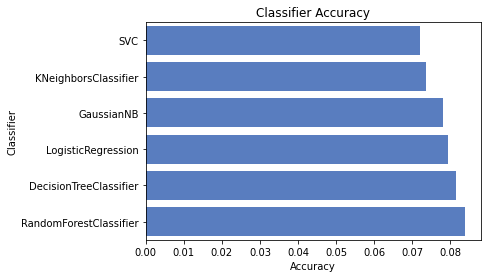

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



classifiers = [
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
acc_dict = {}

for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


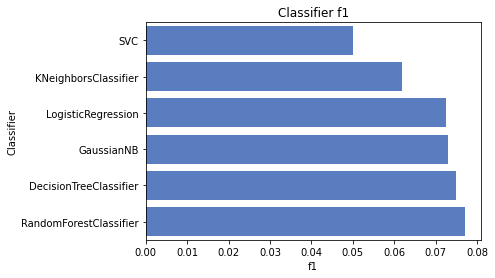

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

classifiers = [
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

log_cols = ["Classifier", "f1"]
log = pd.DataFrame(columns=log_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
acc_dict = {}

for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = f1_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('f1')
plt.title('Classifier f1')

sns.set_color_codes("muted")
sns.barplot(x='f1', y='Classifier', data=log.sort_values(by='f1'), color="b")